<a href="https://colab.research.google.com/github/luishenriquert/pystudy/blob/main/Analise_Dataset_Diabetes_%5BVida_Real%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kstest
from google.colab import files

# Caminho do arquivo CSV
uploaded = files.upload()
df = pd.read_csv('relatorio_comsaude_dados_preenchidos.csv')

# Verificando valores faltantes por coluna
print(df.isnull().sum())

# Verificar o tipo de dados de cada coluna
print(df.dtypes)

# Exibir estatísticas descritivas para colunas numéricas
print(df.describe())

# Verificar valores únicos para colunas categóricas
print(df['Hipertensao? (e-Sus)'].unique())
print(df['Diabetes? (e-Sus)'].unique())



Saving relatorio_comsaude_dados_preenchidos.csv to relatorio_comsaude_dados_preenchidos (1).csv
ID                          0
Data atendimento (e-Sus)    0
Data de nascimento          0
Data exame                  0
Mês exame                   0
Meses ultimo exame          0
Glicemia                    0
Hba1c                       0
Qtd de exames               0
Tendência de Glicemia       0
Tendência de Hba1c          0
Paciente Crítico?           0
Hba1c média acumulada       0
Hipertensao? (e-Sus)        0
Diabetes? (e-Sus)           0
dtype: int64
ID                            int64
Data atendimento (e-Sus)     object
Data de nascimento           object
Data exame                   object
Mês exame                   float64
Meses ultimo exame          float64
Glicemia                    float64
Hba1c                       float64
Qtd de exames               float64
Tendência de Glicemia       float64
Tendência de Hba1c          float64
Paciente Crítico?           float64
Hba1c méd

**Análise dos resultados:** Não há dados ausentes no dataset.
Interpretação:


*   Distribuição de Glicemia e Hba1c: A glicemia e Hba1c mostram algumas variações extremas (glicemia máxima de 398 mg/dL e Hba1c máxima de 15.5%). Esses valores indicam casos graves de hiperglicemia e diabetes descontrolado, o que é importante para priorizar o atendimento clínico.
*   Anomalias Identificadas: Os valores de glicemia e HbA1c parecem conter outliers ou erros de entrada de dados, já que a média está abaixo do esperado para ambos. A glicemia mínima de 0 mg/dL é um valor inválido, o que sugere que alguns registros devem ser investigados.


*   Frequência de Exames: Os pacientes realizam, em média, um exame por mês, o que é adequado para o acompanhamento de diabetes, embora haja casos de pacientes que ficaram até 18 meses sem realizar exames, o que pode indicar pacientes menos acompanhados.
*   Comorbidades: A presença de hipertensão e diabetes em muitos pacientes indica que o seu grupo de análise contém uma população com alta prevalência de comorbidades, o que reforça a necessidade de intervenções clínicas regulares.









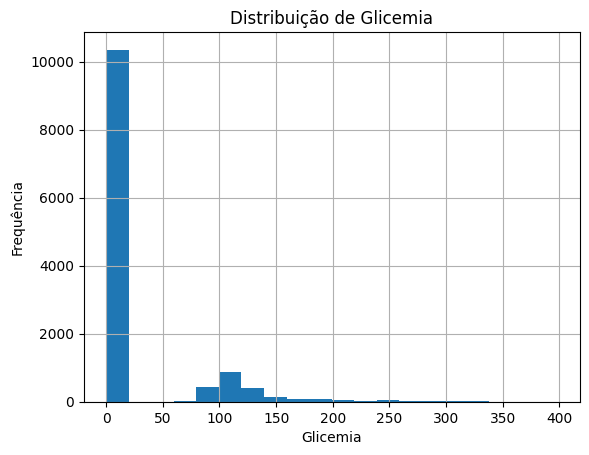

In [3]:
# Histograma para a glicemia
df['Glicemia'].hist(bins=20)
plt.title('Distribuição de Glicemia')
plt.xlabel('Glicemia')
plt.ylabel('Frequência')
plt.show()

Concentração Alta de Valores Próximos à zero ("0") - Foi preciso modificar o dataset com preenchimento de zero ("0") devido a informação vazia, o que causou uma alta concentração de 0 no resultado.

Distribuição secundária (Acima de 100mg/dL):


*   Há uma pequena distribuição de valores entre 100 mg/dL e 250 mg/dL, que é o intervalo esperado para pacientes diabéticos ou com controle glicêmico irregular.

*   Esses valores refletem uma distribuição mais típica de glicemia alta em pacientes com problemas de controle glicêmico, como aqueles com diabetes descontrolado.

Valores Extremos: (Outliers)



*   Há valores de glicemia acima de 300 mg/dL, indo até 398 mg/dL, que indicam pacientes com hiperglicemia severa. Esses são casos graves e geralmente indicam necessidade urgente de intervenção clínica.

Picos de Glicemia:


*    presença de glicemias elevadas (acima de 250 mg/dL) indica um grupo de pacientes que podem estar com diabetes descontrolado ou outras condições graves que afetam a glicemia.






In [5]:
# Converter colunas de data para datetime, se necessário
df['Data atendimento (e-Sus)'] = pd.to_datetime(df['Data atendimento (e-Sus)'], errors='coerce')
df['Data exame'] = pd.to_datetime(df['Data exame'], errors='coerce')

# Verificar se há erros de conversão e estatísticas das datas
print(df['Data atendimento (e-Sus)'].describe())
print(df['Data exame'].describe())

count                                  12608
mean     2023-12-29 20:24:59.014673152-03:00
min                2021-01-25 12:00:00-03:00
25%      2023-08-05 10:52:27.750000128-03:00
50%                2024-05-01 06:45:50-03:00
75%      2024-07-30 06:41:24.249999872-03:00
max                2024-08-31 12:53:07-03:00
Name: Data atendimento (e-Sus), dtype: object
count                             2255
mean     2024-02-09 16:08:43.636363520
min                2023-03-14 00:00:00
25%                2023-10-09 00:00:00
50%                2024-01-31 00:00:00
75%                2024-07-02 00:00:00
max                2024-09-10 00:00:00
Name: Data exame, dtype: object


Interpretação:


*   Discrepância Exames vs Atendimentos: A discrepância entre o número de exames e atendimentos registrados pode indicar que nem todos os exames estão associados a um atendimento formal no sistema (e-SUS).
*   Tendências Temporais: A maior parte dos exames e atendimentos ocorreu nos últimos meses


*   Distribuição de Exames e Atendimentos: A distribuição das datas mostra uma tendência de aumento de exames e atendimentos nos últimos meses





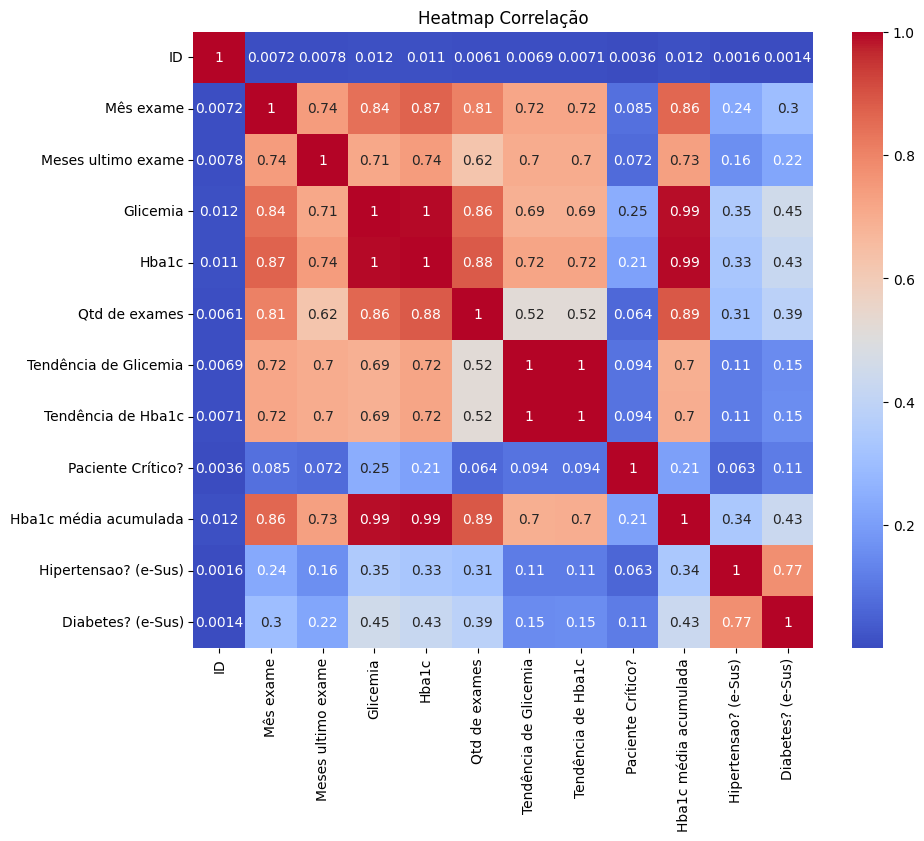

In [6]:
# Selecionando apenas colunas numéricas para a correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Correlação')
plt.show()

Interpretação:


*   Glicemia e Hba1c: Correlação: 0.99 — Existe uma forte correlação positiva entre glicemia e Hba1c, o que faz sentido clinicamente, já que ambos os indicadores estão relacionados ao controle glicêmico e ao diabetes. Isso mostra que pacientes com altos níveis de glicose tendem a ter um Hba1c elevado.
*   Correlação com Hba1c: 0.88 — Pacientes com mais exames também apresentam Hba1c elevado, reforçando o ponto de que esses exames adicionais estão sendo feitos em pacientes com diabetes descontrolado ou em acompanhamento intensivo.
*   Hba1c média acumulada e Glicemia / Hba1c: Correlação com Glicemia: 0.99 — A Hba1c média acumulada está altamente correlacionada com a glicemia e o Hba1c atual, indicando que esse cálculo é um bom indicador da condição glicêmica de longo prazo.


*   Correlação com Hba1c: 0.99 — A Hba1c média acumulada é um reflexo quase exato do Hba1c atual, o que mostra consistência nos dados.
*   Tendência de Glicemia e Hba1c: Correlação com Glicemia: 0.69 — A tendência da glicemia apresenta uma correlação positiva moderada com os níveis atuais de glicose, sugerindo que os pacientes com glicemias mais altas estão em uma trajetória ascendente.


*   Correlação com Hba1c: 0.72 — A tendência da Hba1c também mostra uma correlação moderada com os níveis atuais de Hba1c, indicando uma progressão similar.



*   Paciente Crítico e Glicemia / Hba1c:

Correlação com Glicemia: 0.25 — Pacientes classificados como críticos têm uma leve correlação com glicemias mais altas, o que pode indicar que os níveis de glicose são usados como um fator de classificação, mas não o único.
*   Correlação com Hba1c: 0.21 — A correlação com o Hba1c é similar, reforçando a ideia de que os pacientes críticos têm algum grau de descontrole glicêmico.



*  Hipertensão e Diabetes:

Correlação: 0.77 — Existe uma forte correlação positiva entre hipertensão e diabetes.











In [7]:
# Calculando a correlação entre Glicemia e HBA1C
corr, p_value = pearsonr(df['Glicemia'].dropna(), df['Hba1c'].dropna())

print(f"Coeficiente de Correlação: {corr}")
print(f"p-valor: {p_value}")

Coeficiente de Correlação: 0.9953504386457654
p-valor: 0.0


Interpretação:
A correlação extremamente alta entre glicemia e Hba1c reafirma que esses dois indicadores estão fortemente inter-relacionados. Isso reforça a importância de monitorar ambos para pacientes diabéticos, já que a glicemia diária e o Hba1c fornecem uma visão integrada do controle glicêmico a curto e longo prazo.

O p-valor zero mostra que essa relação é estatisticamente confiável, tornando esse um ponto robusto para discussões no seu material de publicação.

In [9]:
# Dividindo o dataset ao meio
df_part1 = df.iloc[:len(df)//2]
df_part2 = df.iloc[:len(df)//2:]

# Calculando a correlação por cada parte
corr_part1 = df_part1[['Glicemia', 'Hba1c']].corr()
corr_part2 = df_part2[['Glicemia', 'Hba1c']].corr()

print("Correlação na Parte 1:\n", corr_part1)
print("Correlação na Parte 2:\n", corr_part2)

Correlação na Parte 1:
           Glicemia     Hba1c
Glicemia  1.000000  0.995146
Hba1c     0.995146  1.000000
Correlação na Parte 2:
           Glicemia     Hba1c
Glicemia  1.000000  0.995146
Hba1c     0.995146  1.000000


Interpretação:


*   A alta consistência entre as duas metades do dataset demonstra que a relação entre glicemia e Hba1c é estável e não está limitada a um subconjunto específico dos dados. Isso é um bom indicativo de que os dados têm uma qualidade uniforme e que os resultados não são influenciados por valores atípicos concentrados em uma parte específica do dataset.
*   Correlação robusta: A força da correlação em ambas as partes (0.995) reforça que a relação entre os dois indicadores é consistente em todo o dataset. Isso valida que a glicemia e o Hba1c estão fortemente inter-relacionados em diferentes grupos de pacientes, independentemente de como o dataset é dividido.



In [10]:
# Normalidade Kolmogorov-Smirnov para Glicemia
stat_glicemia, p_value_glicemia = kstest(df['Glicemia'].dropna(), 'norm')
print(f'Estatística KS para Glicemia: {stat_glicemia}, P-valor: {p_value_glicemia}')

# Normalidade de Kolmogorov-Smirnov para Hba1c
stat_hba1c, p_value_hb1ac = kstest(df['Hba1c'].dropna(), 'norm')
print(f'Estatística KS para Hb1ac: {stat_hba1c}, P-valor: {p_value_hb1ac}')

Estatística KS para Glicemia: 0.5, P-valor: 0.0
Estatística KS para Hb1ac: 0.5, P-valor: 0.0


Interpretação:


*   A estatística KS de 0.5 é relativamente alta. Quanto maior for esse valor, maior é a diferença entre a distribuição observada dos dados e uma distribuição normal. Isso indica que a glicemia e o Hba1c não seguem uma distribuição normal.

*   A estatística KS de 0.5 é relativamente alta. Quanto maior for esse valor, maior é a diferença entre a distribuição observada dos dados e uma distribuição normal. Isso indica que a glicemia e o Hba1c não seguem uma distribuição normal.


*   Isso confirma que os dados não se comportam como uma distribuição normal padrão. Isso pode ser esperado, dado que a glicemia e o Hba1c geralmente têm uma distribuição enviesada, especialmente em grupos de pacientes com condições médicas específicas, como diabetes.





In [11]:
# Correlação de Spearman
corr, p_value = spearmanr(df['Glicemia'].dropna(), df['Hba1c'].dropna())
print(f"Correlação de Spearman: {corr}, P-valor: {p_value}")

Correlação de Spearman: 0.9999999999999998, P-valor: 0.0


Conclusão
A correlação de Spearman entre glicemia e Hba1c confirma que ambos os indicadores estão fortemente inter-relacionados, reforçando a confiabilidade dos dados.
A alta correlação, juntamente com o p-valor significativo, destaca a importância de monitorar ambos os parâmetros em pacientes, especialmente aqueles com diabetes.